## Changes Made to Notebook 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# Try to import seaborn as a style
try:
  import seaborn as sns
  sns.set_style('whitegrid')
except ImportError:
  # If seaborn is not installed, use default matplotlib style
  plt.style.use('seaborn-whitegrid')

For the changes I decided to increase the centers and sample size to see if k-means algorithm can automatically assign points to the clusters when they're are multiple clusters in the feature space. 
I have changed the centers to 20 and the sample size to 800. 

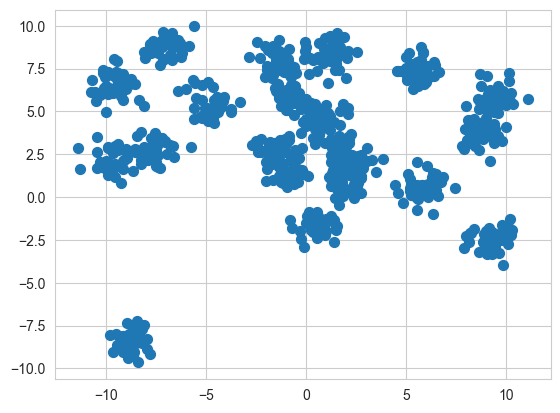

In [8]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=800, centers=20,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

I imported the Kmeans clustering algorithm that partitions data points into K clusters based on their features. I also changed the cluster number to match the cluster change from above. 

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Despite changing the cluster size, the Kmeans algorithm is still able to predict the cluster labels for each data point in X. 

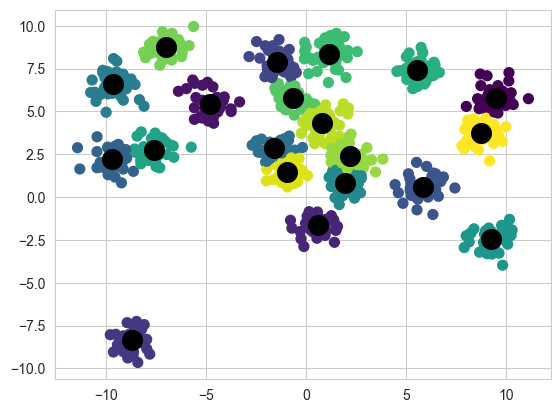

In [15]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(500, noise=.10, random_state=0)

Given that K-means assumes data points are closer to their cluster centers than to others, the algorithm's effectiveness diminishes when clusters are spread widely across the feature space. I increased the sample size to 700 and change the noise variable to 0.10 to see the changes. The noise parameter controls the standard deviation of the Gaussian noise added to the data, which influences the degree of randomness in the points. 

The changes are slightly significant as now the data points are more spread out.

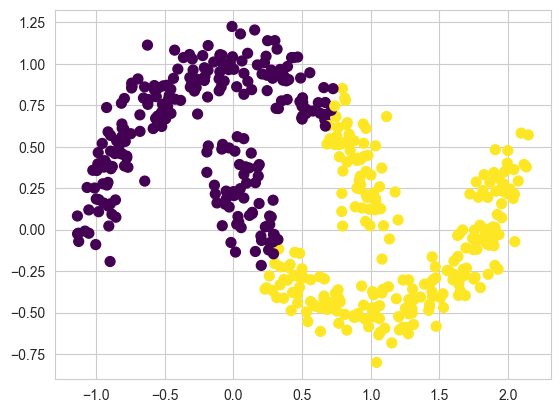

In [22]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Using The Spectral Clustering on the same data as previous does not change anything 



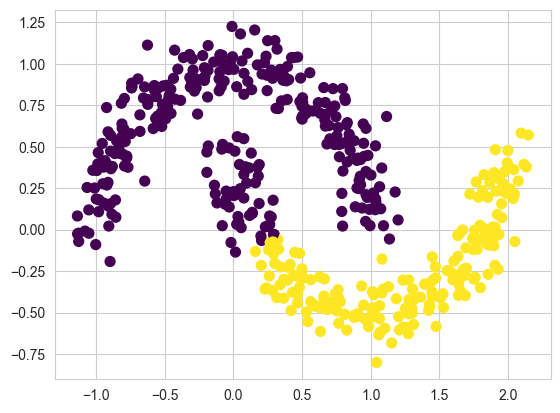

In [23]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

I increased n_clusters to 10, and now the Spectral Clustering algorithm will attempt to partition the data into 10 clusters instead of 2, it's using the nearest neighbors affinity and employing the K-means algorithm for label assignment.

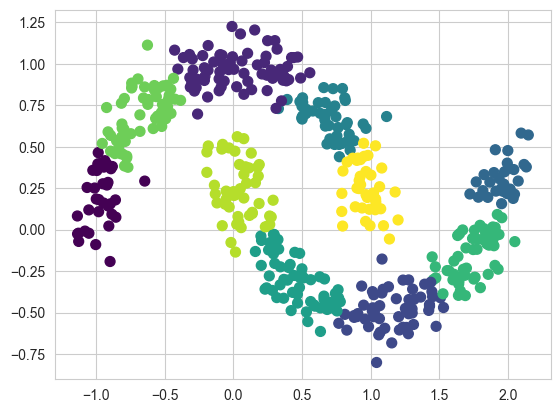

In [25]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=10, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

# K-Means On Digits 

I loaded in the digit dataset used in Jake VanderPlas's notebook and other necessary imports. 

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

I changed the `n_clusters` to 20 

In [32]:
kmeans = KMeans(n_clusters=20, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(20, 64)

Increasing the cluster size to 20 could lead to clusters capturing more specific characteristics of the digits but it could also lead to overfitting since the model could capture more noise or irrelevant data.

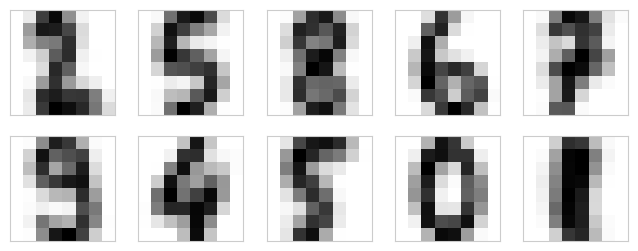

In [33]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(20, -1)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center.reshape(8, 8), interpolation='nearest', cmap=plt.cm.binary)


In [34]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

Changing the cluster size from 10 to 20 has significantly impacted the accuracy score. The original accruacy score for this was 0.7935447968836951 and it has decreased to 0.5692821368948247.

Possible reasons for this:

1. Overfitting: with 20 clusters, the model is possibly learning the training data too well or capturing noise.

2. Increased Complexity: Having more clusters increases the complexity of the model. With 20 clusters, the model might become overly complex, which makes it harder to process new data. 

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.5692821368948247